In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
model = keras.Sequential()

model.add(keras.layers.Dense(40, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(keras.layers.Dense(120, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(keras.layers.Dense(120, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(keras.layers.Dense(24, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(keras.layers.Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.train.AdamOptimizer(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [3]:
data = pd.read_csv("NormalizedData.csv")

Y = data['BUY']
X = data.drop('BUY', axis=1)

X_train, XX, y_train, YY = train_test_split(X, Y, test_size = 0.10)
X_valid, X_test, y_valid, y_test = train_test_split(XX, YY, test_size = 0.50)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
X_valid = X_valid.values
y_valid = y_valid.values

Train on 35121 samples, validate on 1951 samples
Epoch 1/30
35121/35121 [==============================] - 5s 148us/step - loss: 2.7224 - acc: 0.7794 - val_loss: 0.5134 - val_acc: 0.7909
Epoch 2/30
35121/35121 [==============================] - 3s 91us/step - loss: 0.5272 - acc: 0.7799 - val_loss: 0.5133 - val_acc: 0.7909
Epoch 3/30
35121/35121 [==============================] - 3s 90us/step - loss: 0.5272 - acc: 0.7799 - val_loss: 0.5129 - val_acc: 0.7909
Epoch 4/30
35121/35121 [==============================] - 3s 90us/step - loss: 0.5272 - acc: 0.7799 - val_loss: 0.5132 - val_acc: 0.7909
Epoch 5/30
35121/35121 [==============================] - 3s 90us/step - loss: 0.5271 - acc: 0.7799 - val_loss: 0.5145 - val_acc: 0.7909
Epoch 6/30
35121/35121 [==============================] - 3s 90us/step - loss: 0.5272 - acc: 0.7799 - val_loss: 0.5130 - val_acc: 0.7909
Epoch 7/30
35121/35121 [==============================] - 3s 90us/step - loss: 0.5272 - acc: 0.7799 - val_loss: 0.5130 - val_acc

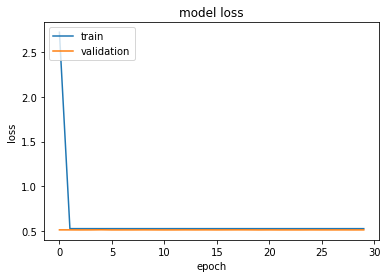

In [4]:
history = model.fit(x=X_train, y=y_train, epochs= 30, validation_data=(X_valid, y_valid))
model.evaluate(x = X_test, y = y_test)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()